In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts import Bar, Line, Overlap

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
%matplotlib inline

In [2]:
data = pd.read_csv('NationalNames.csv')

In [3]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 5 columns):
Id        int64
Name      object
Year      int64
Gender    object
Count     int64
dtypes: int64(3), object(2)
memory usage: 73.4+ MB


## 1. 2010-2017年，Top15的男生、女生英文名

### - 男生

In [12]:
top15_boy = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'M'), :].groupby('Name').Count.sum().nlargest(15)
boy_total = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'M'), :].groupby('Name').Count.sum().sum()

In [13]:
name = list(top15_boy.index)
value = list(top15_boy.values)
wordcloud = WordCloud(width=800, height=450,background_color='#f2eada')  # feeeed
wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')
wordcloud

In [14]:
data_top15_boy = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'M') & 
                          (data['Name']).isin(list(top15_boy.index)), :]

In [15]:
data_top15_boy.sort_values(by = ['Year', 'Count'], ascending=False, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/artist.py:896: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


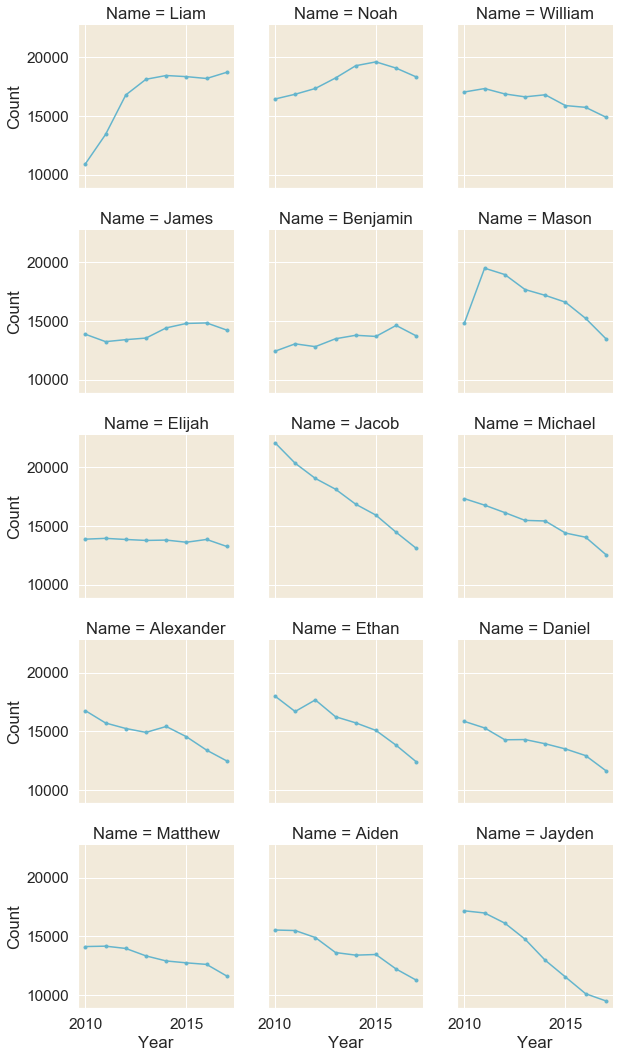

In [16]:
sns.set(font_scale=1.4)
g = sns.FacetGrid(data_top15_boy, col="Name", col_wrap=3)

g = g.map(plt.plot, "Year", "Count",color="c",marker=".")
g.set(axis_bgcolor='#f2eada')

### - 女生

In [499]:
top15_girl = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'F'), :].groupby('Name').Count.sum().nlargest(15)

In [509]:
list(data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'F'), :].groupby('Name').Count.sum().nlargest(30).index)

['Emma',
 'Sophia',
 'Olivia',
 'Isabella',
 'Ava',
 'Mia',
 'Emily',
 'Abigail',
 'Madison',
 'Elizabeth',
 'Charlotte',
 'Chloe',
 'Ella',
 'Amelia',
 'Avery',
 'Sofia',
 'Evelyn',
 'Harper',
 'Addison',
 'Grace',
 'Natalie',
 'Victoria',
 'Lily',
 'Aubrey',
 'Lillian',
 'Zoey',
 'Hannah',
 'Brooklyn',
 'Layla',
 'Samantha']

In [506]:
name = list(top15_girl.index)
value = list(top15_girl.values)
wordcloud = WordCloud(width=800, height=500,background_color='#feeeed')  # feeeed
wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')
wordcloud

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/artist.py:896: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


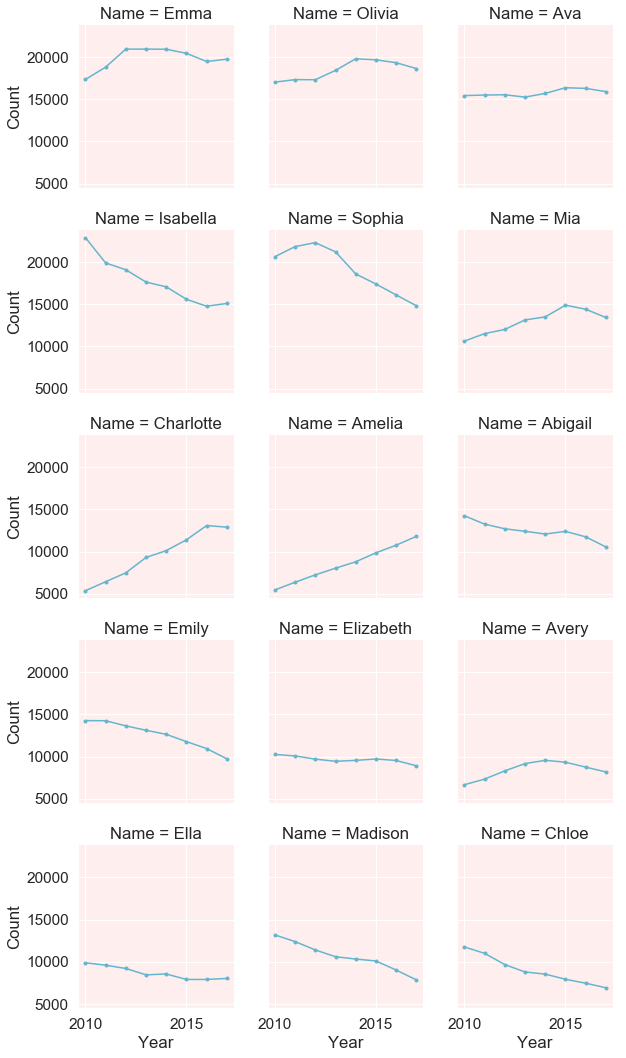

In [501]:
data_top15_girl = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'F') & 
                          (data['Name']).isin(list(top15_girl.index)), :]

data_top15_girl.sort_values(by = ['Year', 'Count'], ascending=False, inplace=True)

sns.set(font_scale=1.4)
g = sns.FacetGrid(data_top15_girl, col="Name", col_wrap=3)

g = g.map(plt.plot, "Year", "Count",color="c",marker=".")
g.set(axis_bgcolor='#feeeed')

## 2. 每个年代，最流行的英文名字
- 1920-2017

In [102]:
data_decades = data[data['Year']>=1920]
data_decades['decade'] = pd.cut(data_decades['Year'], [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2018], 
                                labels = ['20后','30后','40后', '50后','60后','70后','80后','90后','00后','10后'],right=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
decade = data_decades.groupby(['decade', 'Gender', 'Name']).Count.sum().groupby(level=[0,1]).nlargest(1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/artist.py:896: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


[None]

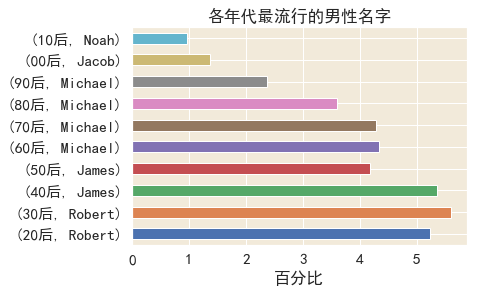

In [104]:
decade_boy_count = decade.iloc[decade.index.get_level_values(3)=='M'].reset_index(level=[0,1,3], drop=True)
decade_boy_total = data_decades[data_decades['Gender']=='M'].groupby('decade').Count.sum()
decade_boy_pct = (decade_boy_count/decade_boy_total*100).round(2)
ax = decade_boy_pct.plot.barh(title='各年代最流行的男性名字')
ax.set_ylabel('')
ax.set_xlabel('百分比')
ax.set(axis_bgcolor='#f2eada')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/artist.py:896: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


[None]

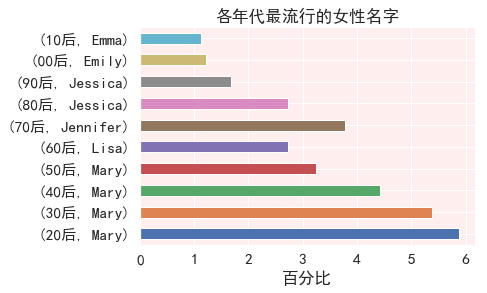

In [105]:
decade_girl_count = decade.iloc[decade.index.get_level_values(3)=='F'].reset_index(level=[0,1,3], drop=True)
decade_girl_total = data_decades[data_decades['Gender']=='F'].groupby('decade').Count.sum()
decade_girl_pct = (decade_girl_count/decade_girl_total*100).round(2)
ax = decade_girl_pct.plot.barh(title='各年代最流行的女性名字')
ax.set_ylabel('')
ax.set_xlabel('百分比')
ax.set(axis_bgcolor='#feeeed')

## 3. 以前很流行，现在不流行的名字

### -男

In [119]:
data_popular_former = data[(data['Year'] < 1950) & (data['Count'] > 10500) & (data['Gender'] == 'M')]
data_not_popular_now = data[(data['Year'] > 2000) & (data['Count'] < 1000) & (data['Gender'] == 'M')]

In [120]:
boys_names_popular_former = list(set(list(data_popular_former.Name.unique())) & set(list(data_not_popular_now.Name.unique())))

In [121]:
boys_names_popular_former_data = data[(data['Name'].isin(boys_names_popular_former)) & (data['Year']>=1920) & (data['Gender']=='M')]

In [124]:
attr = list(range(1920, 2018))
line = Line("",width=800, height=600)
for name in boys_names_popular_former:
    v = list(boys_names_popular_former_data[boys_names_popular_former_data['Name']==name].Count.values)
    line.add(name, attr, v, legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
line

### -女

In [125]:
data_popular_former = data[(data['Year'] < 1950) & (data['Count'] > 22500) & (data['Gender'] == 'F')]
data_not_popular_now = data[(data['Year'] > 2000) & (data['Count'] < 1000) & (data['Gender'] == 'F')]

In [126]:
girl_names_popular_former = list(set(list(data_popular_former.Name.unique())) & set(list(data_not_popular_now.Name.unique())))

In [127]:
girl_names_popular_former_data = data[(data['Name'].isin(girl_names_popular_former)) & (data['Year']>=1920) & (data['Gender']=='F')]

In [128]:
attr = list(range(1920, 2018))
line = Line("",width=800, height=600)
for name in girl_names_popular_former:
    v = list(girl_names_popular_former_data[girl_names_popular_former_data['Name']==name].Count.values)
    line.add(name, attr, v,legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
line

## 4. 2000年后越来越流行的名字

### - 男

In [232]:
data_popular_now = data[(data['Year']>=2000)&(data['Gender'] =='M')&(data['Count']>7000)]
data_popular_now = data_popular_now.pivot(index='Name', columns='Year',values='Count')

In [233]:
year = pd.DataFrame({'Year':list(range(2000, 2018))}, index=list(range(2000, 2018)))

In [234]:
data_popular_now_corr = data_popular_now.corrwith(year['Year'], axis=1)
boys_names_popular_now = list(data_popular_now_corr[data_popular_now_corr > 0.8].index)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [236]:
boys_names_popular_now_data = data[(data['Name'].isin(boys_names_popular_now)) & (data['Year']>=1920) & (data['Gender']=='M')]

In [237]:
boys_names_popular_now_data = boys_names_popular_now_data.pivot(index='Name', columns='Year',values='Count').reset_index().melt('Name', value_name='Count')

In [238]:
attr = list(range(1920, 2018))
line = Line("",width=800, height=600)
for name in boys_names_popular_now:
    v = list(boys_names_popular_now_data[boys_names_popular_now_data['Name']==name].Count.values)
    line.add(name, attr, v, legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
line

### -女

In [246]:
data_popular_now = data[(data['Year']>=2000)&(data['Gender'] =='F')&(data['Count']>6000)]
data_popular_now = data_popular_now.pivot(index='Name', columns='Year',values='Count')

In [252]:
data_popular_now_corr = data_popular_now.corrwith(year['Year'], axis=1)
girls_names_popular_now = list(data_popular_now_corr[data_popular_now_corr > 0.7].index)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [253]:
girls_names_popular_now_data = data[(data['Name'].isin(girls_names_popular_now)) & (data['Year']>=1920) & (data['Gender']=='F')]

In [254]:
girls_names_popular_now_data = girls_names_popular_now_data.pivot(index='Name', columns='Year',values='Count').reset_index().melt('Name', value_name='Count')

In [255]:
attr = list(range(1920, 2018))
line = Line("",width=800, height=600)
for name in girls_names_popular_now:
    v = list(girls_names_popular_now_data[girls_names_popular_now_data['Name']==name].Count.values)
    line.add(name, attr, v, legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
line

## 5. 影响美国人取名的因素：体育明星、电视明星

In [383]:
from pyecharts import Overlap
def name_trend(name, data, gender=['M','F'], year=1920, dodge = 500):
    if isinstance(gender, str):
        name_data = data[(data['Name'] == name)&(data['Gender']==gender)&(data['Year']>=year)]
        attr = list(name_data['Year'].values)
        bar = Bar(name)
        bar.add("", attr, list(name_data['Count'].values), mark_line=["average"], mark_point=["max", "min"],
               legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
        line = Line()
        line.add("", attr, list(name_data['Count'].values + dodge))
        
    else:
        name_data = data[(data['Name'] == name)&(data['Year']>=year)]
        attr = list(range(year, 2018))
        v1 = name_data[name_data['Gender']==gender[0]].Count.values
        v2 = name_data[name_data['Gender']==gender[1]].Count.values
        bar = Bar(name)
        bar.add("男", attr, list(v1), legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
        bar.add("女", attr, list(v2), legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
        line = Line()
        line.add("", attr, list(v1 + dodge))
        line.add("", attr, list(v2 + dodge))
    
    overlap = Overlap()
    overlap.add(bar)
    overlap.add(line)
    return overlap

- 体育明星：Jordan, Kobe, Lebron

In [394]:
name_trend('Jordan',data,gender='M',year=1960)

In [385]:
name_trend('Kobe',data,gender='M',year=1920, dodge=100)

- 影视明星：Emma, Scarlett

In [390]:
name_trend('Emma',data,gender='F',year=1980)

In [389]:
name_trend('Scarlett',data,gender='F',year=1980, dodge=200)

In [392]:
name_trend('Chandler',data,year=1976, dodge=100)

In [412]:
name_trend('Taylor',data,year=1976, dodge=100)

In [419]:
name_trend('Riley', data,year=1976, dodge=100)

## 6. 为什么同一发音的名字，有很多不同的拼写变体？ 
- Catherine/Katharine
[C|k]ath(.*)

In [472]:
Catherine = data['Name'][data['Name'].str.contains('^[C|K]ath(.*)')].unique()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [476]:
Catherine_data = data[data['Name'].isin(Catherine)].groupby('Name').Count.sum()

In [477]:
name = list(Catherine_data.index)
value = list(Catherine_data.values)
wordcloud = WordCloud(width=1000, height=600,background_color='#feeeed')  # feeeed
wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')
wordcloud

In [478]:
Emily = data['Name'][data['Name'].str.contains('Emil(.*)')].unique()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [479]:
Emily_data = data[data['Name'].isin(Emily)].groupby('Name').Count.sum()

In [480]:
name = list(Emily_data.index)
value = list(Emily_data.values)
wordcloud = WordCloud(width=1000, height=600,background_color='#feeeed')  # feeeed
wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')
wordcloud

## 7. 一些具有特殊含义的名字，有多少人取？

In [406]:
def name_trend2(name, data, gender, dodge=100):
    name_data = data[(data['Name']==name)&(data['Gender']==gender)]
    attr = list(name_data['Year'].values)
    v1 = name_data['Count'].values

    bar = Bar(name)
    bar.add("", attr, list(v1), legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
    
    line = Line()
    line.add("", attr, list(v1 + dodge))
    
    overlap = Overlap()
    overlap.add(bar)
    overlap.add(line)
    return overlap

In [407]:
name_trend2('Dick',data,gender='M', dodge=50)

In [489]:
name_trend2('Dong', data, gender='M', dodge=1)

In [495]:
name_trend2('Cherry',data,gender='F', dodge=10)

## 8. 一些特殊的名字

In [448]:
class Solution:
    # @return a string
    def getlongestpalindrome(self, s, l, r):
        while l >= 0 and r < len(s) and s[l] == s[r]:
            l -= 1; r += 1
        return s[l+1 : r]
    def longestPalindrome(self, s):
        palindrome = ''
        for i in range(len(s)):
            len1 = len(self.getlongestpalindrome(s, i, i))
            if len1 > len(palindrome): palindrome = self.getlongestpalindrome(s, i, i)
            len2 = len(self.getlongestpalindrome(s, i, i + 1))
            if len2 > len(palindrome): palindrome = self.getlongestpalindrome(s, i, i + 1)
        return True if len(palindrome) > 5 else False

In [449]:
a = Solution()

In [450]:
a.longestPalindrome('alfrederfl')

True

In [451]:
all_name = data['Name'].unique()

In [452]:
palindrome_name = []
for name in all_name:
    if a.longestPalindrome(name):
        palindrome_name.append(name)

In [455]:
palindrome_data = data[data['Name'].isin(palindrome_name)].groupby('Name').Count.sum()

In [460]:
name = list(palindrome_data.index)
value = list(palindrome_data.values)
wordcloud = WordCloud(width=1000, height=600,background_color='#feeeed')  # feeeed
wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')
wordcloud